In [11]:
import numpy as np
import pandas as pd
import deeplabcut
import torch
from pathlib import Path

Loading DLC 3.0.0rc13...


In [12]:
from utils.vis import *
from utils.postprocessing import *

import importlib
import utils.vis
import utils.postprocessing

importlib.reload(utils.vis)
importlib.reload(utils.postprocessing)

<module 'utils.postprocessing' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\utils\\postprocessing.py'>

# Data Loading and Config

In [4]:
from pathlib import Path

print("Current working directory:", Path.cwd())

Current working directory: c:\Users\jexia\OneDrive\Documents\projects\datafawn


In [5]:
# video_path = Path('videos/deervid.mp4').resolve()
video_path = Path('videos/deer2.mp4').resolve()

videotype = video_path.suffix

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device('cpu')
    print("CUDA not available, using CPU")

Using GPU: NVIDIA GeForce RTX 5070 Ti Laptop GPU


# Running Pretrained Model

**NOTE**: we are using quadruped. This is for side-view of quadrupeds. There are other models (for humans, birds, top-down mouse, etc.)

In [ ]:
scale_list = []
max_individuals = 1

processed_videos = deeplabcut.video_inference_superanimal(
    [video_path],
    'superanimal_quadruped',
    max_individuals=max_individuals,
    model_name='hrnet_w32',
    detector_name='fasterrcnn_resnet50_fpn_v2',
    videotype=videotype,
    # video_adapt=True,
    # scale_list=scale_list,
    pcutoff=0.15,
    dest_folder = 'processed_vids',
    device = device
)

Running video inference on [WindowsPath('C:/Users/jexia/OneDrive/Documents/projects/datafawn/videos/deer2.mp4')] with superanimal_quadruped_hrnet_w32
Using pytorch for model hrnet_w32
Processing video C:\Users\jexia\OneDrive\Documents\projects\datafawn\videos\deer2.mp4
Starting to analyze C:\Users\jexia\OneDrive\Documents\projects\datafawn\videos\deer2.mp4
Video metadata: 
  Overall # of frames:    615
  Duration of video [s]:  20.52
  fps:                    29.97
  resolution:             w=640, h=480

Running detector with batch size 1


100%|██████████| 615/615 [00:45<00:00, 13.59it/s]


Running pose prediction with batch size 1


100%|██████████| 615/615 [00:28<00:00, 21.21it/s]


Saving results to processed_vids
Saving results in processed_vids\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5 and processed_vids\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__full.pickle


c:\Users\jexia\anaconda3\envs\DEEPLABCUT\Lib\site-packages\deeplabcut\utils\make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Duration of video [s]: 20.52, recorded with 29.97 fps!
Overall # of frames: 615 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 615/615 [00:05<00:00, 117.96it/s]

Video with predictions was saved as processed_vids


In [13]:
# Load data
h5_file = 'processed_vids/deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
# h5_file = 'processed_vids/vid1_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'

pose_data = pd.read_hdf(h5_file)

pose_data = pose_data.sort_index(axis=1)

# Get error masks

In [14]:
# After running detect_pose_errors
paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
error_details = detect_pose_errors(
    pose_data,
    bodyparts=paws,
    velocity_threshold=50,
    min_likelihood=0.0,
    max_distance=300
)
error_details

,front_left_paw_velocity,front_left_paw_likelihood,front_left_paw_distance,front_left_paw_error,front_right_paw_velocity,front_right_paw_likelihood,front_right_paw_distance,front_right_paw_error,back_left_paw_velocity,back_left_paw_likelihood,back_left_paw_distance,back_left_paw_error,back_right_paw_velocity,back_right_paw_likelihood,back_right_paw_distance,back_right_paw_error
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


c:\Users\jexia\OneDrive\Documents\projects\datafawn\utils\vis.py:392: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


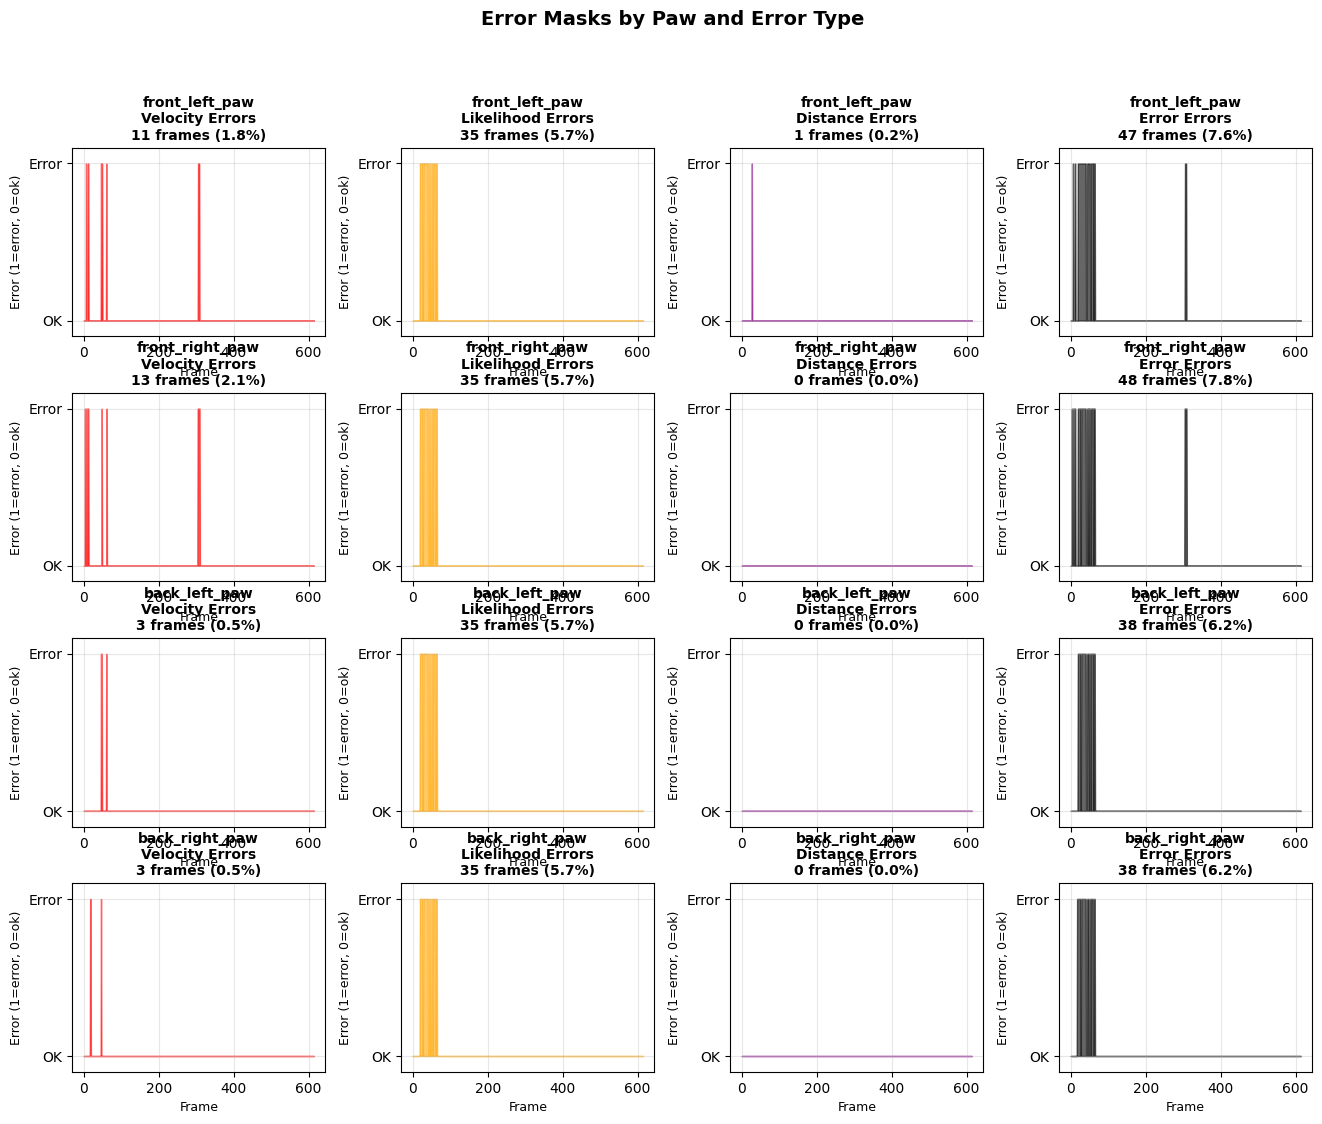

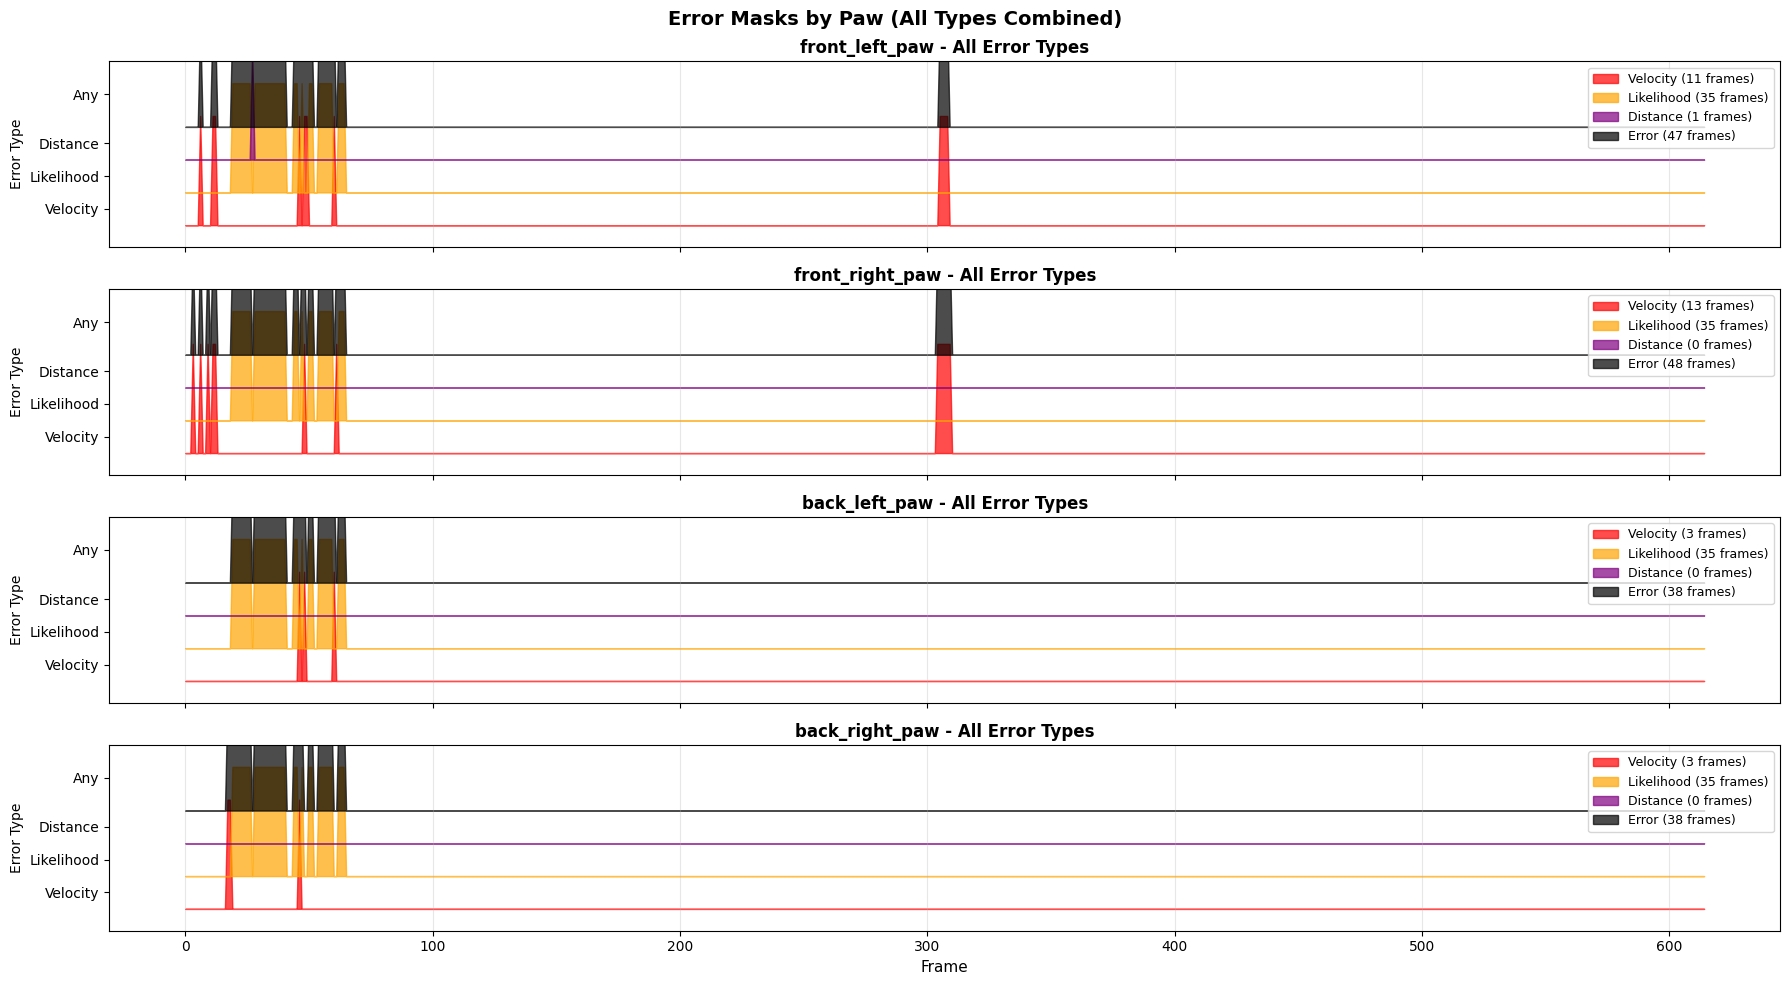


Error Summary Statistics:
            Paw Error Type  Count  Percentage
 front_left_paw   Velocity     11    1.788618
 front_left_paw Likelihood     35    5.691057
 front_left_paw   Distance      1    0.162602
 front_left_paw      Error     47    7.642276
front_right_paw   Velocity     13    2.113821
front_right_paw Likelihood     35    5.691057
front_right_paw   Distance      0    0.000000
front_right_paw      Error     48    7.804878
  back_left_paw   Velocity      3    0.487805
  back_left_paw Likelihood     35    5.691057
  back_left_paw   Distance      0    0.000000
  back_left_paw      Error     38    6.178862
 back_right_paw   Velocity      3    0.487805
 back_right_paw Likelihood     35    5.691057
 back_right_paw   Distance      0    0.000000
 back_right_paw      Error     38    6.178862


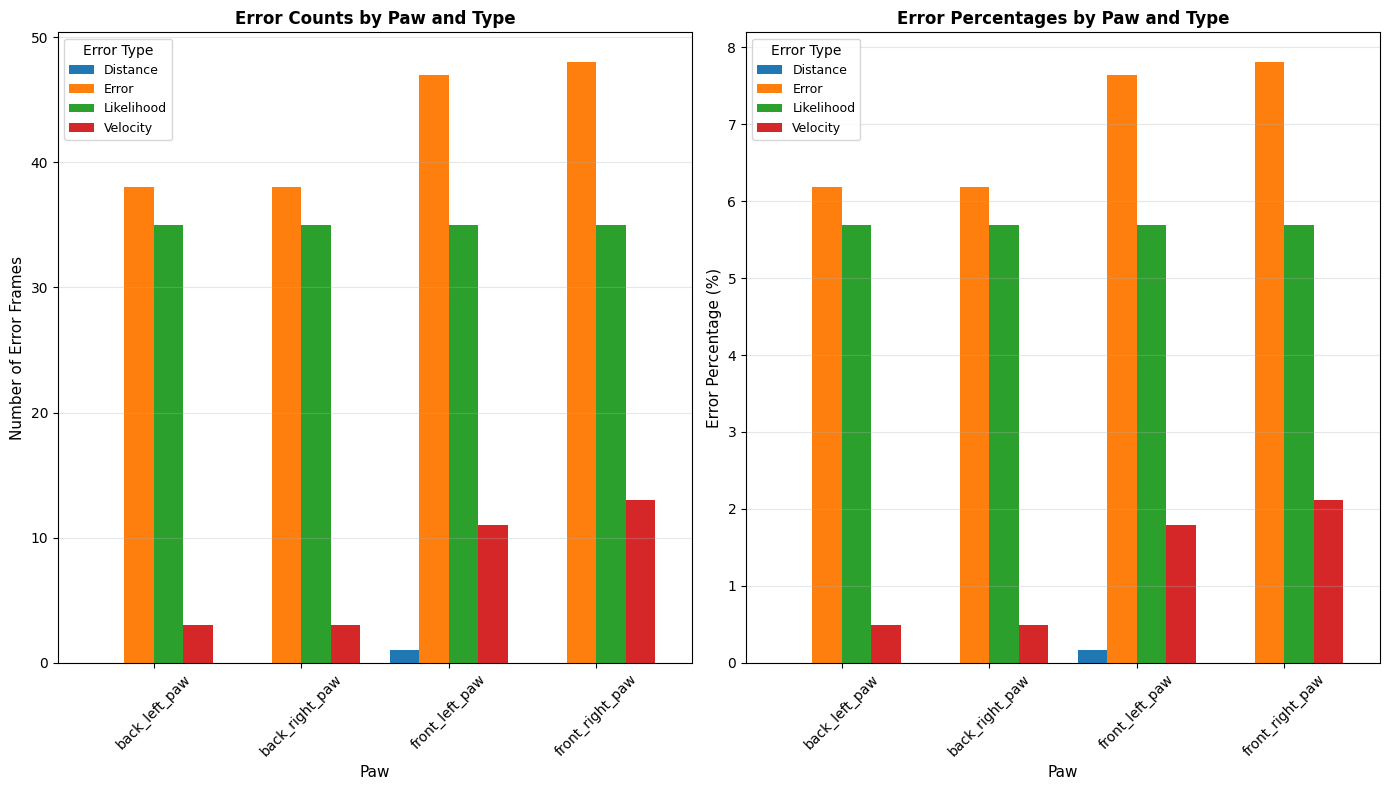

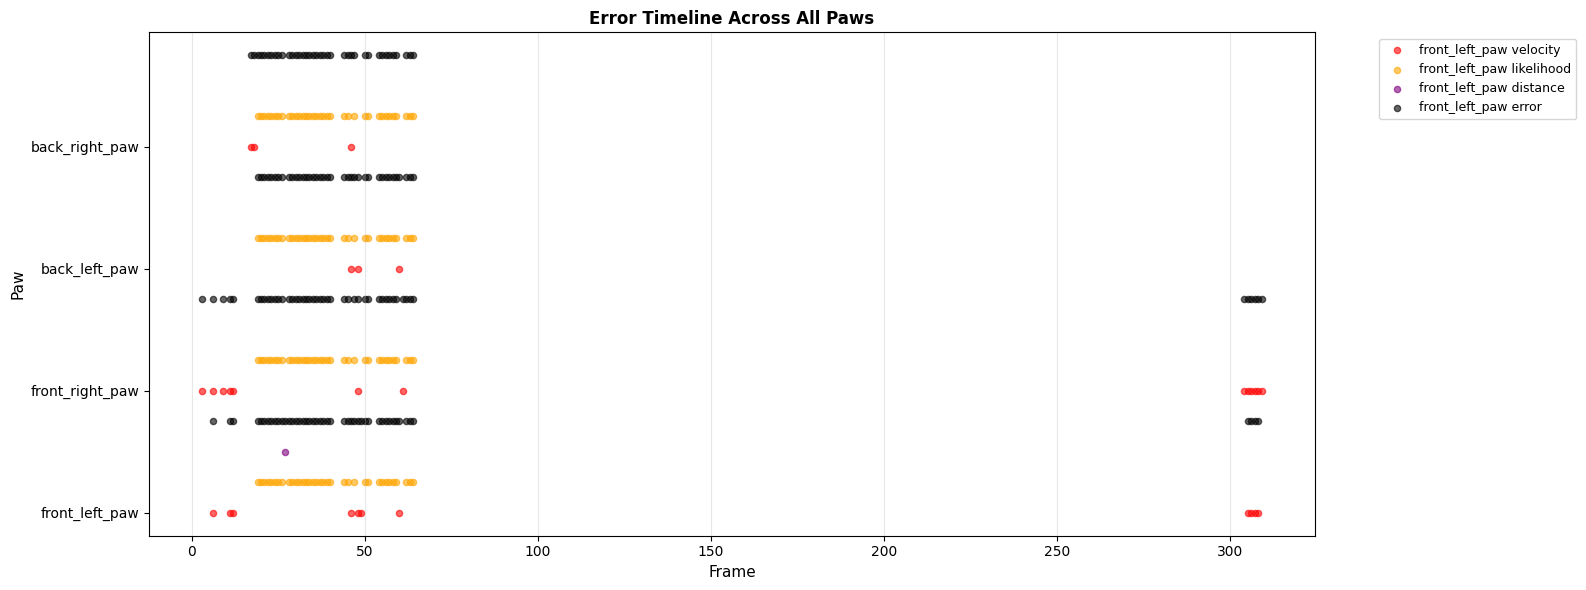

In [15]:


# Visualization 1: Separate plots for each paw and error type
fig1 = visualize_error_masks(error_details, paws)
plt.show()

# Visualization 2: Combined view - all error types per paw
fig2 = visualize_error_masks_combined(error_details, paws)
plt.show()

# Visualization 3: Summary statistics
fig3, stats_df = visualize_error_summary(error_details, paws)
plt.show()

# Visualization 4: Timeline view
fig4 = visualize_error_timeline(error_details, paws)
plt.show()

In [16]:
error_details

,front_left_paw_velocity,front_left_paw_likelihood,front_left_paw_distance,front_left_paw_error,front_right_paw_velocity,front_right_paw_likelihood,front_right_paw_distance,front_right_paw_error,back_left_paw_velocity,back_left_paw_likelihood,back_left_paw_distance,back_left_paw_error,back_right_paw_velocity,back_right_paw_likelihood,back_right_paw_distance,back_right_paw_error
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
error_mask = error_details[['front_left_paw_error', 'front_right_paw_error', 'back_left_paw_error', 'back_right_paw_error']].copy()
error_mask.columns = [col.replace('_error', '') for col in error_mask.columns]

error_mask

,front_left_paw,front_right_paw,back_left_paw,back_right_paw
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False
...,...,...,...,...
610,False,False,False,False
611,False,False,False,False
612,False,False,False,False
613,False,False,False,False


# Perform Normalization

In [18]:
pose_data_with_rel = paw_to_relative_position(pose_data, append_to_df=True)

Dataframe with relative positions created:
Original shape: (615, 117)
New shape: (615, 129)

New bodyparts added:
['back_left_paw_rel', 'back_right_paw_rel', 'front_left_paw_rel', 'front_right_paw_rel']


In [19]:
pose_data_with_rel

scorer      superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_  \
individuals                                                     animal0   
bodyparts                                                     back_base   
coords                                                       likelihood   
0                                                     0.014207            
1                                                     0.022539            
2                                                     0.025167            
3                                                     0.047044            
4                                                     0.013458            
..                                                         ...            
610                                                   0.384946            
611                                                   0.410142            
612                                                   0.384520            
613                                                   0.437993            
614                                                   0.367385            

scorer                                                                  \
individuals                                                              
bodyparts                             back_end                           
coords                x           y likelihood           x           y   
0            367.023438  176.054688   0.763108  239.976562  219.304688   
1            388.898438  169.429688   0.732230  244.195312  216.679688   
2            386.906250  207.835938   0.711897  242.031250  215.429688   
3            307.382812  213.585938   0.706119  243.554688  206.867188   
4            388.484375  218.023438   0.251928  247.171875  203.210938   
..                  ...         ...        ...         ...         ...   
610          355.570312  260.429688   0.822463  216.242188  275.492188   
611          345.687500  270.976562   0.857489  213.937500  278.695312   
612          346.523438  275.718750   0.873518  205.335938  287.531250   
613          340.960938  284.835938   0.832556  204.273438  296.226562   
614          335.656250  289.835938   0.856896  194.593750  301.226562   

scorer                                                            ...  \
individuals                                                       ...   
bodyparts   back_left_knee                         back_left_paw  ...   
coords          likelihood           x           y    likelihood  ...   
0                 0.460591  239.976562  294.992188      0.484380  ...   
1                 0.700803  247.148438  287.554688      0.541245  ...   
2                 0.694743  249.656250  279.976562      0.611155  ...   
3                 0.660738  246.914062  274.054688      0.396257  ...   
4                 0.436350  258.328125  273.570312      0.381618  ...   
..                     ...         ...         ...           ...  ...   
610               0.960003  231.304688  362.101562      0.891875  ...   
611               0.855104  229.437500  367.460938      0.845014  ...   
612               0.903228  224.945312  378.093750      0.871995  ...   
613               0.881311  219.460938  383.554688      0.864184  ...   
614               0.902020  209.843750  388.554688      0.875545  ...   

scorer                                                                  \
individuals                                                              
bodyparts      tail_end throat_base                         throat_end   
coords                y  likelihood           x           y likelihood   
0            238.226562    0.024649  350.804688  211.195312   0.033894   
1            228.492188    0.063446  388.898438  166.476562   0.052405   
2            219.226562    0.102740  394.531250  177.460938   0.051024   
3            220.304688    0.069175  384.648438  190.070312   0.041592   
4            210.617188    0.073937  258.328125  321.710938   0.017864   
.

# Zeni Algorithm

In [20]:
import importlib

from utils.zeni import *
from utils.vis import *

import utils.zeni
import utils.vis

importlib.reload(utils.zeni)
importlib.reload(utils.vis)

<module 'utils.vis' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\utils\\vis.py'>

**From manual counting**:
- Front right leg:
    - 5 steps in beginning
        - first 4 are slighlty covered
    - 4 at the end
        - first one is a pivoting step

- Front left leg
    - 

In [55]:
print(len(error_mask))
print(len(pose_data_with_rel))

615
615


In [64]:
strikes_w3 = zeni_algorithm(
    pose_data_with_rel,
    window_size=3,
    min_contact_duration=3,
    velocity_threshold=10,
    error_mask=error_mask
)
# # Plot results for each paw
# for paw in ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']:
#     plot_strikes(pose_data_with_rel, strikes, paw, 0, 1000)

In [65]:
strikes_w5 = zeni_algorithm(
    pose_data_with_rel,
    window_size=5,
    min_contact_duration=3,
    velocity_threshold=10,
    error_mask=error_mask
)
# # Plot results for each paw
# for paw in ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']:
#     plot_strikes(pose_data_with_rel, strikes, paw, 0, 1000)

In [68]:
for key in strikes_w3.keys():
    print(key)
    print(len(strikes_w3[key]))
    print(len(strikes_w5[key]))
    print()


front_left_paw
14
14

front_right_paw
9
10

back_left_paw
14
10

back_right_paw
20
14



# Add sounds

In [69]:
from add_sounds_to_video import add_sounds_for_all_paws
from utils.postprocessing import *

import importlib
import add_sounds_to_video

importlib.reload(add_sounds_to_video)
# importlib.reload()

<module 'add_sounds_to_video' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\add_sounds_to_video.py'>

In [ ]:


# Define different sounds for each paw
paw_sound_map = {
    'front_left_paw': 'sounds/22415__anthousai__wind-chimes/398494__anthousai__wind-chimes-single-01.wav',
    'front_right_paw': 'sounds/22415__anthousai__wind-chimes/398493__anthousai__wind-chimes-single-02.wav',
    'back_left_paw': 'sounds/22415__anthousai__wind-chimes/398492__anthousai__wind-chimes-single-03.wav',
    'back_right_paw': 'sounds/22415__anthousai__wind-chimes/398496__anthousai__wind-chimes-single-04.wav'
}


# Add all sounds to video at once
output_path = add_sounds_for_all_paws(
    video_path='processed_vids\\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4',
    strikes_dict=strikes_w3,  # Your strikes from zeni_algorithm
    paw_sound_map=paw_sound_map,
    output_path = 'finished_vids/all.mp4')

Loading video: processed_vids\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4
Video FPS: 29.97002997002997
Video duration: 20.52 seconds

Processing back_left_paw:
  Found 14 strikes
  Strike timestamps: ['0.37s', '3.97s', '5.37s']...
  Sound duration: 3.19 seconds
  Created 14 audio clips for back_left_paw

Total audio clips created: 14

Writing output video to: finished_vids\blp_w3.mp4
MoviePy - Building video finished_vids\blp_w3.mp4.
MoviePy - Writing audio in blp_w3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video finished_vids\blp_w3.mp4



MoviePy - Done !
MoviePy - video ready finished_vids\blp_w3.mp4
Done! Output saved to: finished_vids\blp_w3.mp4
